# Análide de dados de exames de mama

Sua missão: você deverá criar um modelo de decisão que observe as características das imagens e informe se a imagem analisada apresenta um tumor benigno ou maligno.

In [3]:
#importando as bibliotecas

import numpy as np
import pandas as pd


In [4]:
#carregando o conjunto de dados e atribuindo a uma variável
#cancer de mama

from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()


In [5]:
#carregando o conjunto de dados em um dataframe

breast_data = pd.DataFrame(breast.data, columns=breast.feature_names)


In [6]:
#obtendo informações sobre os dados

breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
#visualisação dos dados de forma tabular
#limitado a 5 linhas

breast_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#obtendo medias, modas, mediana, etc.

breast_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
#importando bibliotecas para gráficos

import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

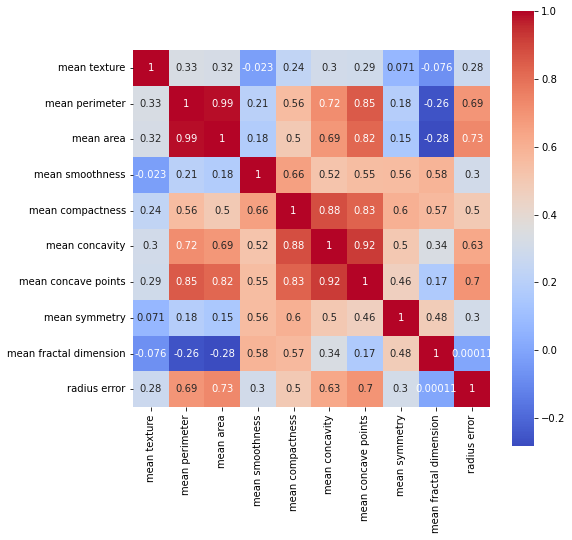

In [10]:
#criação de grafico de calor
#observando quais dados são mais semelhantes entre si
#mostra a corelação

plt.figure(figsize=(8,8))
atrib_medias = breast_data.columns[1:11]
m_corr = breast_data[atrib_medias].corr()
sns.heatmap(m_corr, cmap='coolwarm', annot=True, square=True)

In [11]:
#criando DataFrame para os rotulos e associando com as classes

labels = pd.DataFrame(breast.target, columns=['class'])
labels_class = labels['class'].map({0: 'maligno', 1: 'benigno'})


<AxesSubplot:xlabel='class', ylabel='count'>

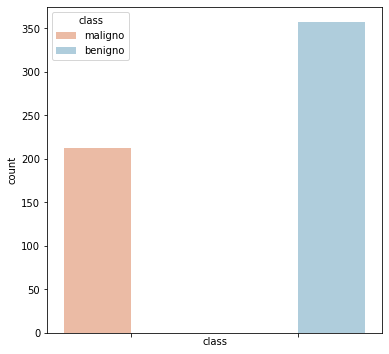

In [12]:
#observando a distribuição dos valores de classe em grafico de barras

plt.figure(figsize=(6, 6))
plt.tick_params(labelbottom=False)
sns.countplot(data=labels, x="class", hue=labels_class,
             palette=sns.color_palette("RdBu", 2))

In [13]:
#verificando quantidade exata de registros em cada classe

labels["class"].value_counts()

1    357
0    212
Name: class, dtype: int64

In [14]:
#analisando o conjunto de atributos em relação à classe
#incluindo a classe no conjunto de dados

breast_data["class"] = labels

<Figure size 432x432 with 0 Axes>

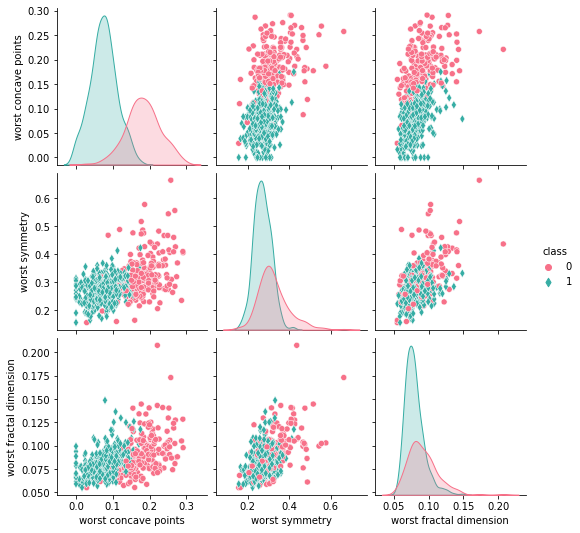

In [15]:
#selecionando os ultimos 3 atributos do conjunto de dados e plotando os relacionamentos emparelhados no conjunto de dados

atrib_3ultimos = breast_data.columns[27:31]
plt.figure(figsize=(6, 6))
sns.pairplot(breast_data[atrib_3ultimos], hue="class", palette="husl",
            markers=['o', 'd'])

• As classes (0 e 1, vermelho e azul) aparecem com rara sobreposição nos gráficos de dispersão, indicando que os objetos do conjunto de dados podem ser 
facilmente discriminados. Por exemplo, a maior parte dos objetos do gráfico 
“simetria x pontos côncavos” pode ser separada por uma única reta;

• Nos gráficos de densidade apresentados na diagonal principal, a sobreposição 
de classes acontece na análise univariada dos atributos. O atributo “dimensão 
fractal”, por exemplo, apresenta medidas estatísticas muito semelhantes entre as classes (Figura 12), podendo impedir que elas sejam discriminadas unicamente 
por esse atributo.

In [16]:
breast_data.groupby('class').describe()['worst fractal dimension']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,212.0,0.091530,0.021553,0.05504,0.076302,0.08760,0.102625,0.2075
1,357.0,0.079442,0.013804,0.05521,0.070090,0.07712,0.085410,0.1486


In [17]:
#normalizando os dados
# importando a classe StandardScaler para realizar a normalização

from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
atributos_treinamento = breast_data.columns[0:30]
breast_data[atributos_treinamento] = stdScaler.fit_transform(breast_data[atributos_treinamento])

# Treinar e avaliar modelos

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [19]:
#metricas de avaliação

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [20]:
#validação cruzada com 10 subconjuntos e 10 repetições
#importação da classe RepeatedKFold

from sklearn.model_selection import RepeatedKFold

In [21]:
#criando variavel

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

In [22]:
#experimentando

accuracies = []
precisions = []
recalls =[]

In [23]:
for train_idx, test_idx in rkf.split(breast_data):
    #Divide o conjunto em treinamento e teste
    X_train, X_test = breast_data.iloc[train_idx, :-1], breast_data.iloc[test_idx, :-1]
    y_train, y_test = breast_data.iloc[train_idx, -1], breast_data.iloc[test_idx, -1]
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    #Prediz os rótulos no conjunto de teste
    y_pred = model.predict(X_test)
    
    #calcula a acurácia, a precisão e a sencibilidade
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    prec = precision_score(y_test, y_pred)
    precisions.append(prec)
    
    rec = recall_score(y_test, y_pred)
    recalls.append(rec)

In [24]:
#calculando média e desvio padrão

print("Regressão Logística")
print("Acurácia       : %.3f +- %.3f" % (np.mean(accuracies), np.std(accuracies)))
print("Precisão       : %.3f +- %.3f" % (np.mean(precisions), np.std(precisions)))
print("Sensibilidade  : %.3f +- %.3f" % (np.mean(recalls), np.std(recalls)))

Regressão Logística
Acurácia       : 0.978 +- 0.018
Precisão       : 0.977 +- 0.023
Sensibilidade  : 0.988 +- 0.016


# Otimizar o Modelo

In [25]:
#busca em grade

from sklearn.model_selection import GridSearchCV

In [29]:
logReg = LogisticRegression()
clf = GridSearchCV(estimator=logReg, param_grid = params, cv = 10, verbose=True, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

NameError: name 'params' is not defined

In [30]:
best_model.best_params_

NameError: name 'best_model' is not defined

In [35]:
#configurando os valores dos hiperparâmetros no experimento

model = LogisticRegression(C=0.052, penalty='l2', solver='liblinear')

Com os hiperparâmetros encontrados e definidos no modelo de Regressão Logística, obtivemos:

• Melhora de 0,31% na acurácia, de 97,8% para 98,1%;

• Piora de 0,10% na precisão, de 97,7% para 97,6%;

• Melhora de 0,61% na sensibilidade, de 98,8% para 99,4%.

Embora a precisão tenha apresentado uma queda pouco significativa, as demais métricas tiveram um desempenho incrementado